## Undirected Weighted Graph

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

class edge():
    def __init__(self, s: str, t: str, weight:float):
        self.s = s
        self.t = t
        self.weight = weight
        
    def __str__(self):
        return "{} -({})-> {}".format(self.s,self.weight,self.t)
    ('A', 'C', 3)
    
    def __lt__(self, other):
        """Less-than comparison."""
        return self.weight < other.weight

class node():
    def __init__(self, name: str):
        """
         - node has a name (str)
         - DIFFERENTLY neighbors is the list of edge objects
        """
        self.name = name
        self.neighbors = [] # list of edge objects !!
        
    def neighbors_name(self) -> list:
        """
        info about neighbors names (returns list of strings)
        """
        return [(e.s, e.t, e.weight) for e in self.neighbors]
      
        
class weightedGraph():
    def __init__(self, elist: list):
        """
            self.nodes is a dictionary
                key   : node name
                value : node object
        """
        self.elist = elist
        self.node_names = list(set([s for s, t, w in elist] + [t for s,t,w in elist]))
        self.nodes = {s:node(s) for s in self.node_names}
        
        self.create_graph()
      
    def add_edge(self, e:edge):
        """undirected Edge"""
        self.nodes[e.s].neighbors.append(e)
        self.nodes[e.t].neighbors.append(e)
    
    def create_graph(self):
        for s,t,w in self.elist:
            e = edge(s,t,w)
            self.add_edge(e)
                
    def info(self) -> dict:
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}
    
    def draw(self, color = 'orange'):
        """
            Usage of networkx for visualisation
        """
        G = nx.Graph()
        G.add_weighted_edges_from(self.elist)
        plt.figure(figsize=(20,10))
       
        pos = nx.spring_layout(G)  # positions for all nodes
        nx.draw(G, pos, node_size=2000, node_color=color, font_size=40, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos, font_size=20,  edge_labels = nx.get_edge_attributes(G,'weight'))        

## Lazy Prim MST

In [2]:
from heapq import *

class LazyPrimMST():
    def __init__(self, G:weightedGraph):
        self.G = G
        self.marked = {node_name: False for node_name in self.G.node_names} # MST vertices
        self.mst = [] # MST edges
        self.pq = []  # Priority Queue of edges
        
        self.visit(self.G.node_names[0])
        while self.pq:
            weight, e = heappop(self.pq) 
            if self.marked[e.s] and self.marked[e.t]: continue
            self.mst.append(e)
            if not self.marked[e.s]: self.visit(e.s)
            if not self.marked[e.t]: self.visit(e.t) 
                
    def visit(self, v: str):
        self.marked[v] = True
        for e in self.G.nodes[v].neighbors:
            s, t, weight = e.s, e.t, e.weight
            if not self.marked[s]: heappush(self.pq, (weight, e))
            if not self.marked[t]: heappush(self.pq, (weight, e)) 
    
    def display(self):
        return [(e.s, e.t, e.weight) for e in self.mst]

# Quiz: Greedy Clustering Algorithm

## Python Cluster class

Write a python class that can find clusters based on Prim's Minimum Spaning Tree algorithm. 

To get `k = 3` clusters
1. Build MST
 - Construct the given weighted undirected graph
 - Run the given `Lazy Prim's Minimum spaning Tree` algorithm

2. Remove Edges
 - Automaticaly Delete $k-1$ longest edges
 

## 0. Build the graph
Use the given weightedGraph class
![graph.png](graph.png)

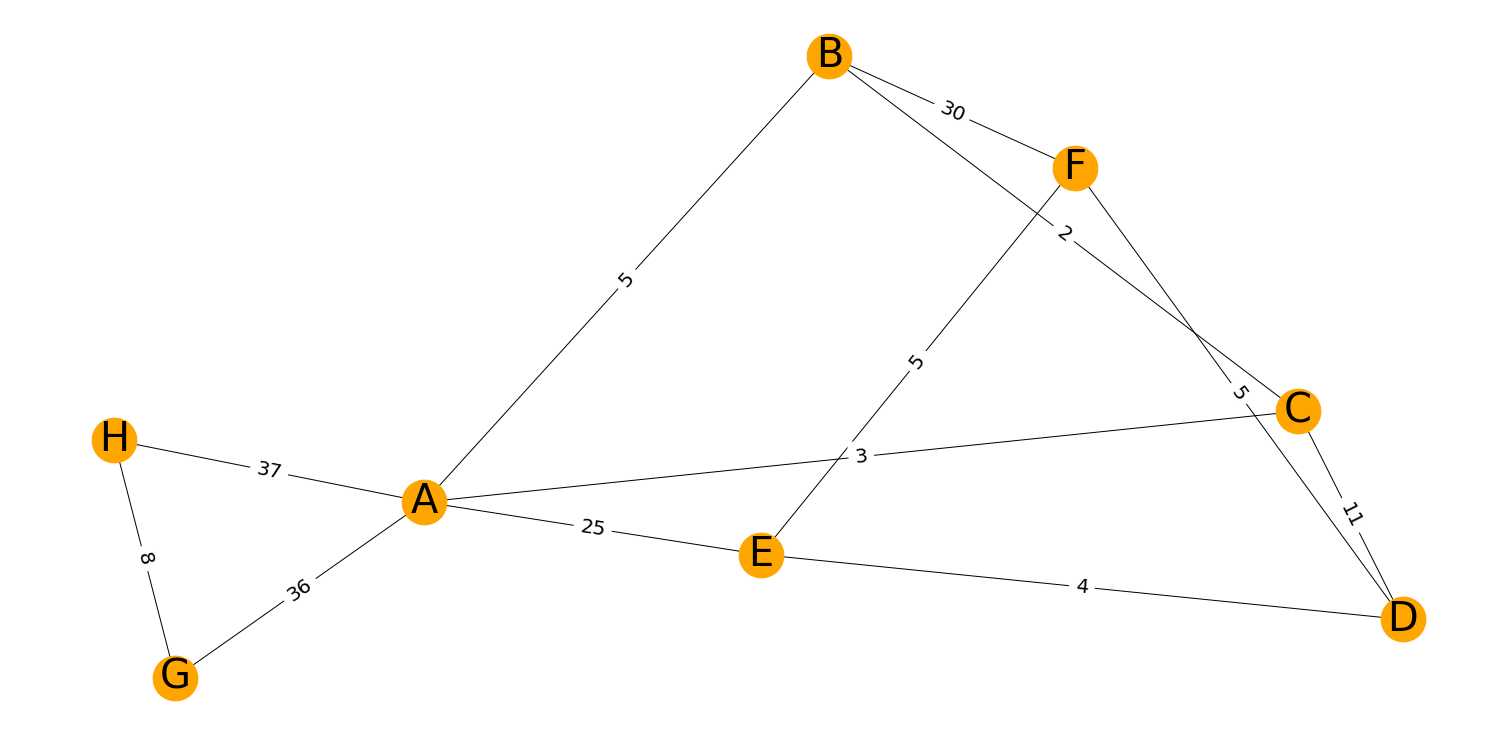

In [3]:
elist =[('A', 'G', 36),
        ('G', 'H', 8),
        ('H', 'A', 37),
        ('A', 'B', 5),
        ('A', 'C', 3),
        ('B', 'C', 2),
        ('A', 'E', 25),
        ('C', 'D', 11),
        ('B', 'F', 30),
        ('E', 'D', 4),
        ('E', 'F', 5),
        ('D', 'F', 5)]

G = weightedGraph(elist)
G.draw()

In [4]:
G.info()

{'A': [('A', 'G', 36),
  ('H', 'A', 37),
  ('A', 'B', 5),
  ('A', 'C', 3),
  ('A', 'E', 25)],
 'C': [('A', 'C', 3), ('B', 'C', 2), ('C', 'D', 11)],
 'D': [('C', 'D', 11), ('E', 'D', 4), ('D', 'F', 5)],
 'G': [('A', 'G', 36), ('G', 'H', 8)],
 'F': [('B', 'F', 30), ('E', 'F', 5), ('D', 'F', 5)],
 'H': [('G', 'H', 8), ('H', 'A', 37)],
 'B': [('A', 'B', 5), ('B', 'C', 2), ('B', 'F', 30)],
 'E': [('A', 'E', 25), ('E', 'D', 4), ('E', 'F', 5)]}

## 1. Build MST

Run Prim's algorithm to find out minimum spaning tree
![](mst.png)

In [5]:
T = LazyPrimMST(G)
mst = T.display()
mst

[('A', 'C', 3),
 ('B', 'C', 2),
 ('C', 'D', 11),
 ('E', 'D', 4),
 ('D', 'F', 5),
 ('A', 'G', 36),
 ('G', 'H', 8)]

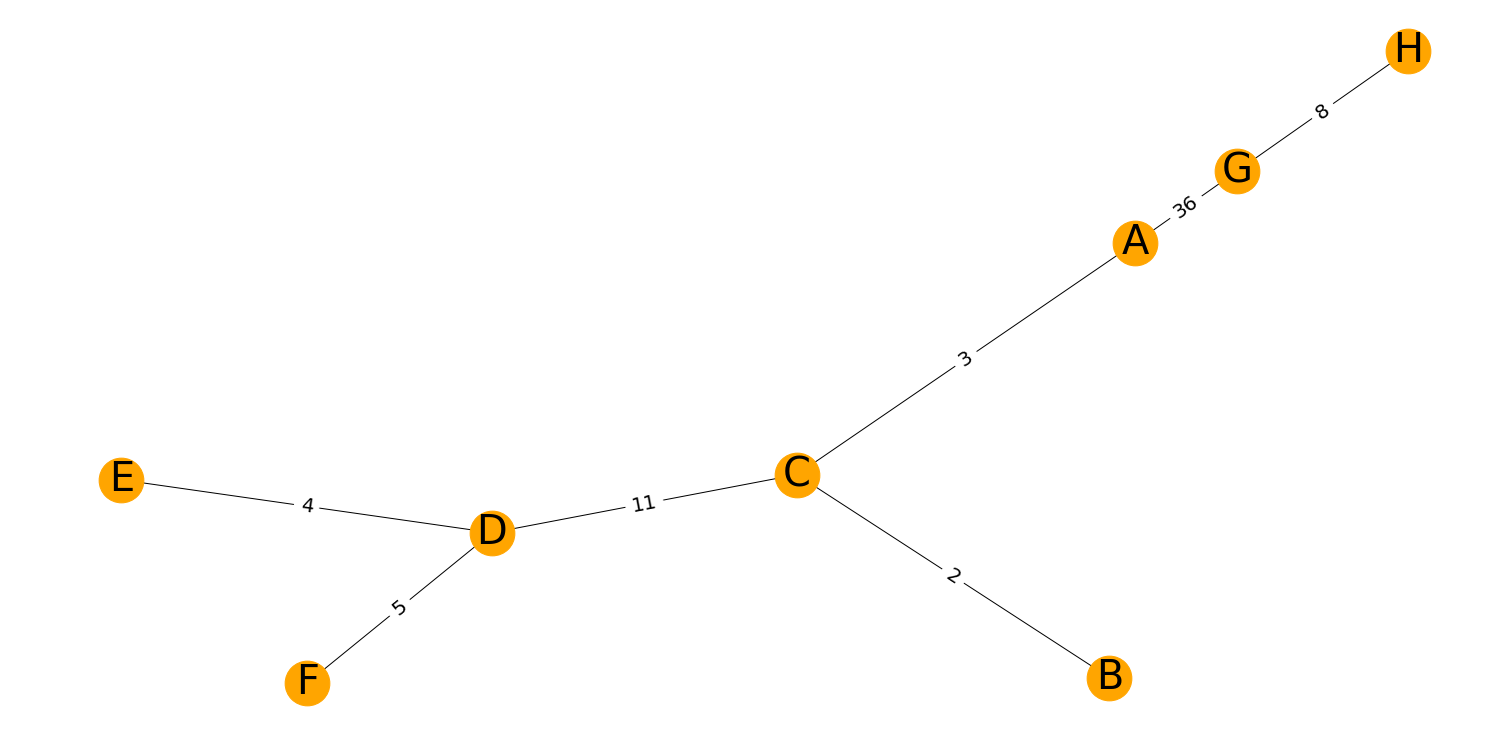

In [6]:
G3 = weightedGraph(mst)
G3.draw()

## 2. Edge Removal

 - Write an automated code for longest edge removal repeatedly
 - Use `Priority Queue`!!
 
Remove 2 longest edges from MST, and you will get `k=3` clusters.

![](clusters.png)

In [7]:
mst

[('A', 'C', 3),
 ('B', 'C', 2),
 ('C', 'D', 11),
 ('E', 'D', 4),
 ('D', 'F', 5),
 ('A', 'G', 36),
 ('G', 'H', 8)]

In [8]:
from heapq import *

h = []
for s,t,weight in mst:
    heappush(h, (1/weight, (s,t,weight)))
h

[(0.027777777777777776, ('A', 'G', 36)),
 (0.2, ('D', 'F', 5)),
 (0.09090909090909091, ('C', 'D', 11)),
 (0.5, ('B', 'C', 2)),
 (0.25, ('E', 'D', 4)),
 (0.3333333333333333, ('A', 'C', 3)),
 (0.125, ('G', 'H', 8))]

In [9]:
heappop(h)

(0.027777777777777776, ('A', 'G', 36))

In [10]:
heappop(h)

(0.09090909090909091, ('C', 'D', 11))

In [11]:
h

[(0.125, ('G', 'H', 8)),
 (0.2, ('D', 'F', 5)),
 (0.3333333333333333, ('A', 'C', 3)),
 (0.5, ('B', 'C', 2)),
 (0.25, ('E', 'D', 4))]

In [12]:
clusters = [e for v, e in h]
clusters

[('G', 'H', 8), ('D', 'F', 5), ('A', 'C', 3), ('B', 'C', 2), ('E', 'D', 4)]

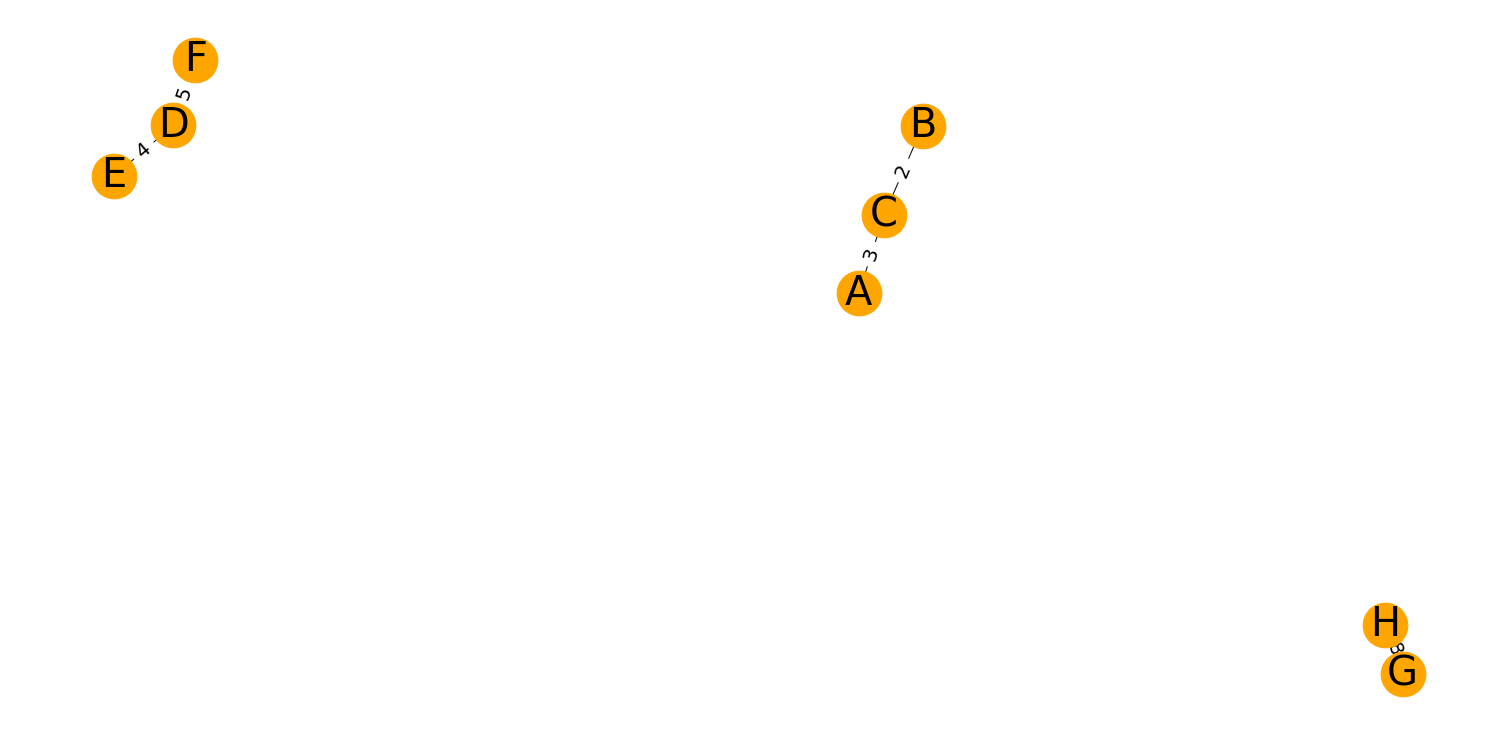

In [13]:
G4 = weightedGraph(clusters)
G4.draw()

## 3. Write KClustering python cluster class

Write whole your code as a python class


In [14]:
class KClustering():
    def __init__(self, G, k = 2):
        # Bulid MST
        self.T = LazyPrimMST(G)
        self.mst = self.T.display()
        
        # Build PQ of edges
        self.pq = []
        for s,t,weight in self.mst:
            heappush(self.pq, (1/weight, (s,t,weight)))
            
        # Remove k-1 longest edges
        for i in range(k-1):
            heappop(self.pq)
            
        self.clusters = [e for v, e in self.pq]
        


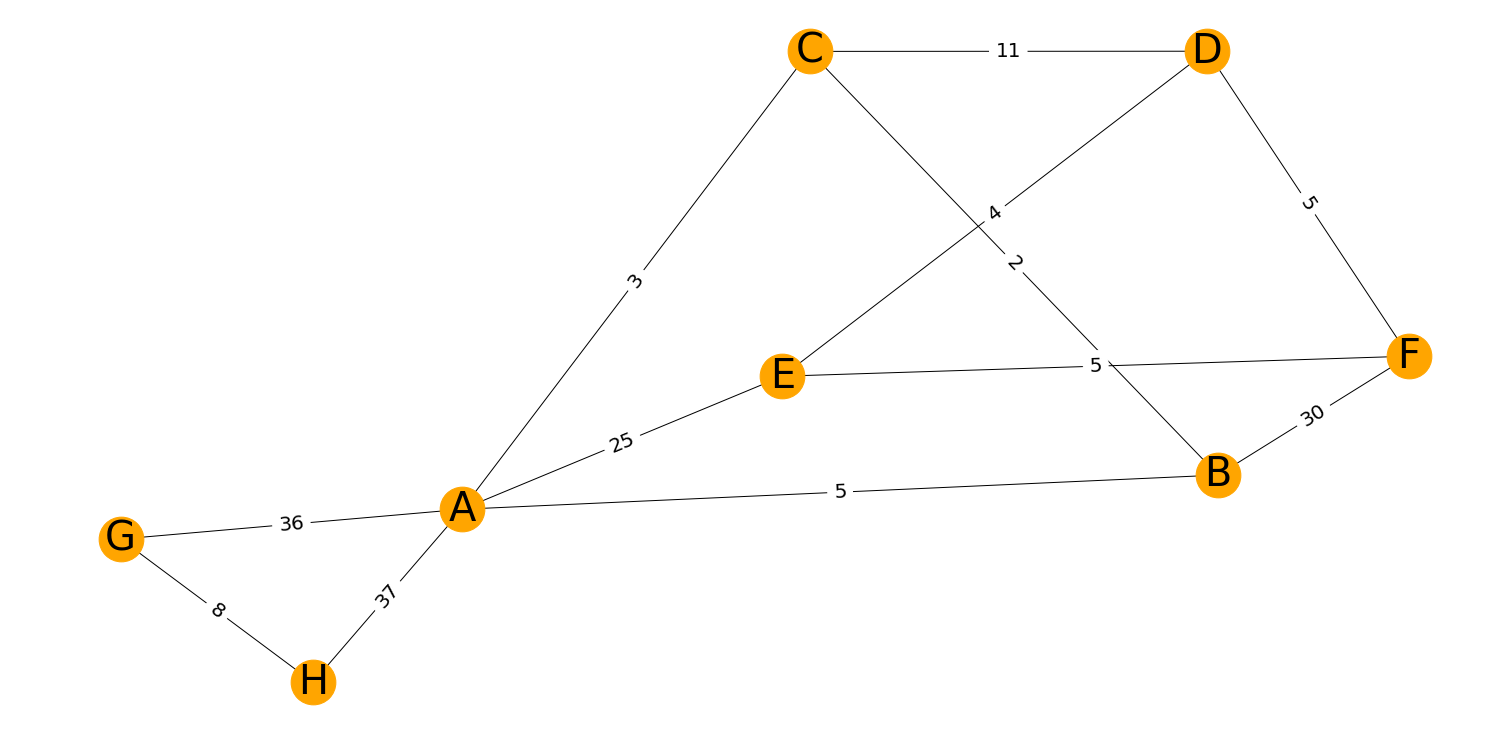

In [15]:
G.draw()

In [16]:
clusters = KClustering(G, k =3)
clusters.clusters

[('G', 'H', 8), ('D', 'F', 5), ('A', 'C', 3), ('B', 'C', 2), ('E', 'D', 4)]

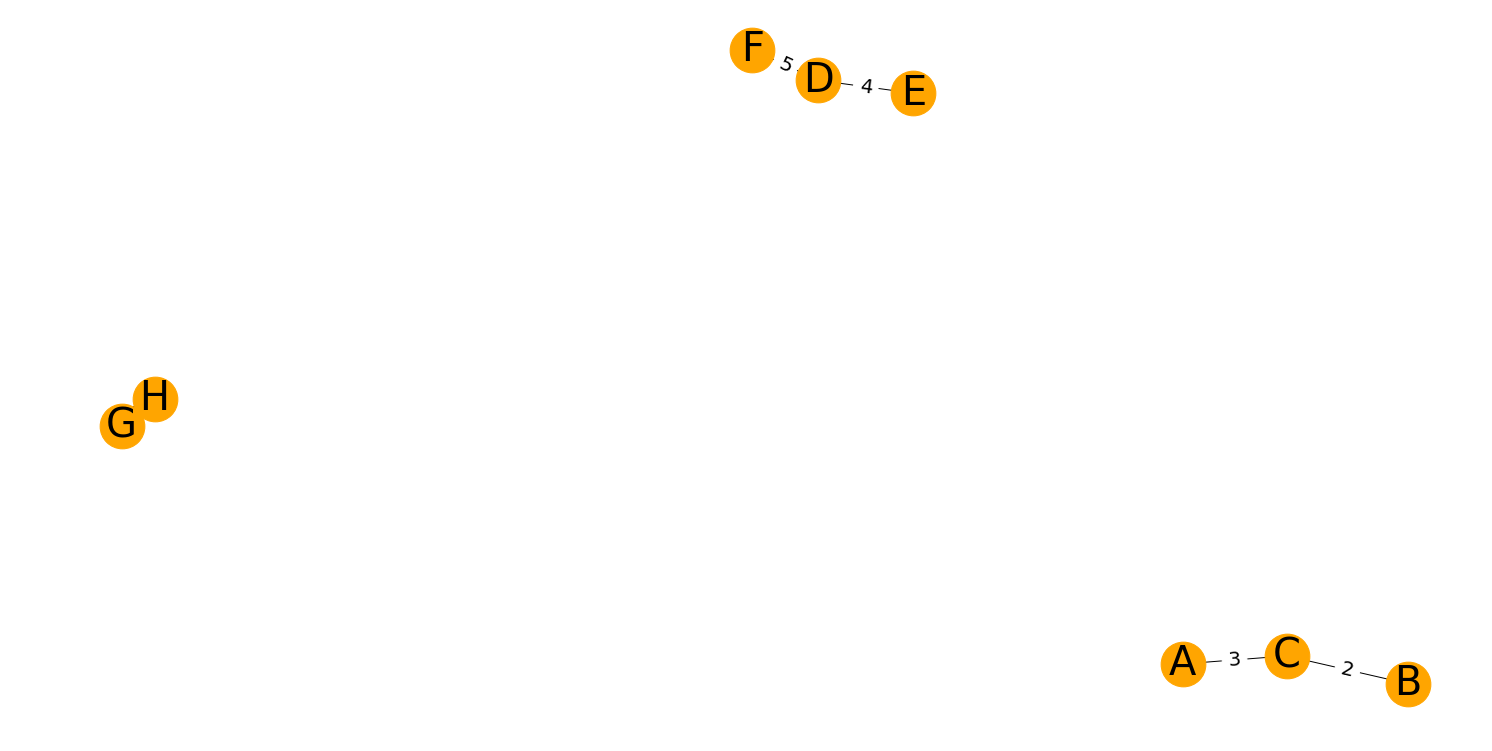

In [17]:
G5 = weightedGraph(clusters.clusters)
G5.draw()

## 4. Write the Code of Eager Prim MST
 - Modify the lazy version

In [18]:
from heapq import *

class PrimMST():
    def __init__(self, G:weightedGraph):
        self.G = G
        
        self.pq = []  # Priority Queue of edges
        self.marked = {n: False for n in self.G.node_names} # MST vertices
        self.edgeTo = {n: None for n in self.G.node_names} # Shortest edge From Tree to node
        self.distTo = {n: float("inf") for n in G.node_names}
        
        s = self.G.node_names[0]
        self.distTo[s] = 0
        heappush(self.pq, (self.distTo[s], s)) 
        
        while self.pq:
            _, v = heappop(self.pq)
            self.visit(v)
                
    def visit(self, v: str):
        self.marked[v] = True
        for e in self.G.nodes[v].neighbors:
            s, t, weight = e.s, e.t, e.weight
            
            other = s
            if s == v: other = t

            if self.marked[other]: continue
            if weight < self.distTo[other]: 
                self.edgeTo[other] = e
                self.distTo[other] = weight
                heappush(self.pq, (self.distTo[other], other))
    
    def display(self):
        return [(e.s, e.t, e.weight) for e in self.edgeTo.values() if e != None] 

In [19]:
T = PrimMST(G)
eager_mst = T.display()
eager_mst

[('A', 'C', 3),
 ('C', 'D', 11),
 ('A', 'G', 36),
 ('D', 'F', 5),
 ('G', 'H', 8),
 ('B', 'C', 2),
 ('E', 'D', 4)]

In [20]:
mst

[('A', 'C', 3),
 ('B', 'C', 2),
 ('C', 'D', 11),
 ('E', 'D', 4),
 ('D', 'F', 5),
 ('A', 'G', 36),
 ('G', 'H', 8)]

## 5. Modify KClustering Class to include Eager Prim MST
 - Make `K = 2`
 
 ![](2cluster.png)

In [21]:
class KClustering():
    def __init__(self, G, k = 2):
        # Bulid MST
        self.T = PrimMST(G) # eager
        self.mst = self.T.display()
        
        # Build PQ of edges
        self.pq = []
        for s,t,weight in self.mst:
            heappush(self.pq, (1/weight, (s,t,weight)))
            
        # Remove k-1 longest edges
        for i in range(k-1):
            heappop(self.pq)
            
        self.clusters = [e for v, e in self.pq]
        

In [22]:
clusters = KClustering(G, k =2)
clusters.clusters

[('C', 'D', 11),
 ('G', 'H', 8),
 ('E', 'D', 4),
 ('A', 'C', 3),
 ('D', 'F', 5),
 ('B', 'C', 2)]

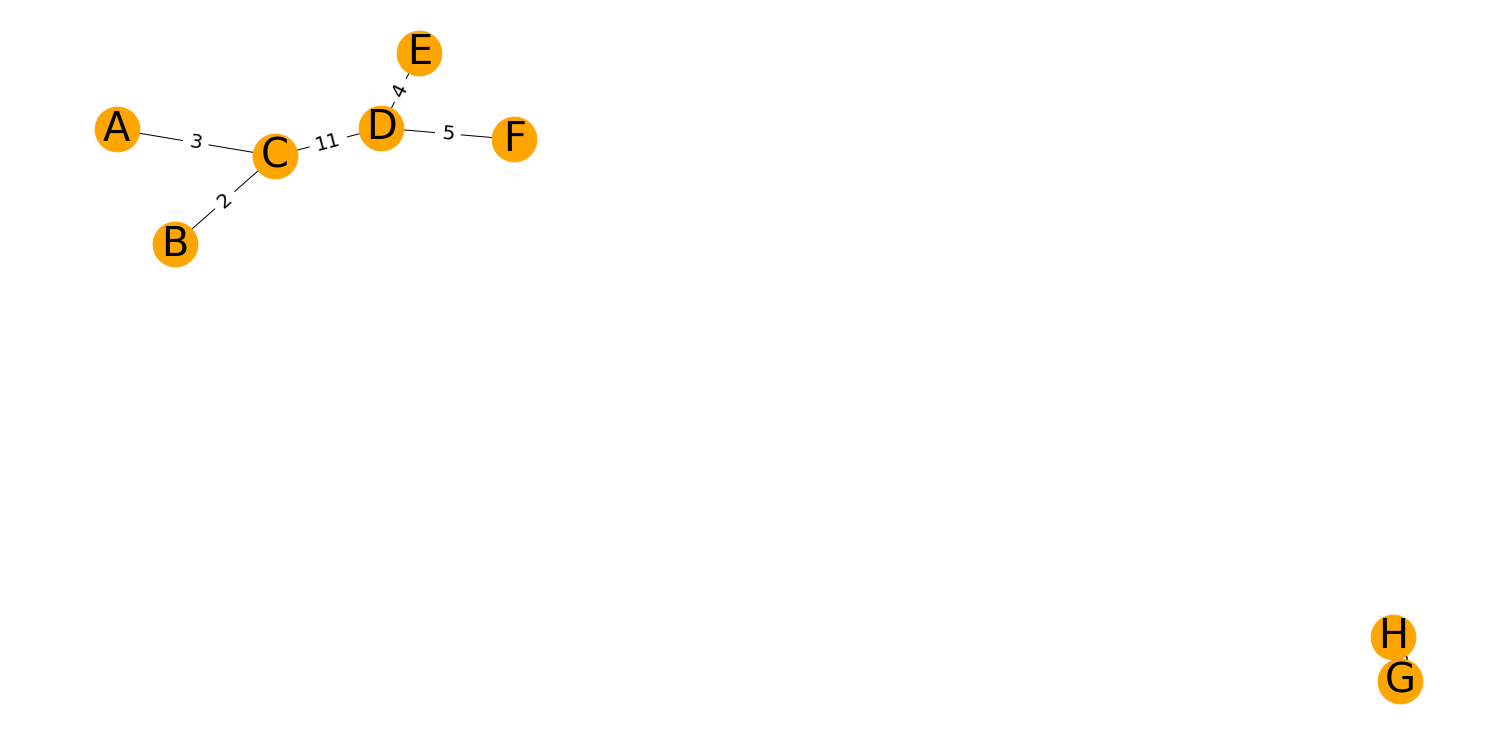

In [23]:
G6 = weightedGraph(clusters.clusters)
G6.draw()